In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np
import scipy.stats as sts

In [3]:
city_data_file = 'Resources/city_data.csv'
ride_data_file = 'Resources/ride_data.csv'

city_data_df = pd.read_csv(city_data_file)
ride_data_df = pd.read_csv(ride_data_file)

In [4]:
print(city_data_df.head(10))
print(ride_data_df.head(10))

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   1119539277

In [5]:
print(ride_data_df.dtypes)
print(city_data_df.dtypes)
print(ride_data_df.count())
print(city_data_df.count())
print(city_data_df.isnull().sum())
print(ride_data_df.isnull().sum())

city        object
date        object
fare       float64
ride_id      int64
dtype: object
city            object
driver_count     int64
type            object
dtype: object
city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [6]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
print(sum(city_data_df['type'] == 'Urban'))
print(sum(city_data_df['type'] == 'Suburban'))
print(sum(city_data_df['type'] == 'Rural'))


66
36
18


In [8]:
#merge the data frames

pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on =['city', 'city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# create bubble chart that showcases the average fare versus 
# the total number of rides with bubble size based on the total number
# of drivers for each city type, including urban, suburban, and rural


# Create the Urban City DataFrame

urban_city_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_city_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
# create the suburban city DataFrame

suburb_city_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
suburb_city_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [11]:
# create the rural city data type

#Get the ride count per city.
rural_city_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_city_df                           

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
#Get the ride count per city.
urban_ride_count = urban_city_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [13]:
#Get the ride count per city.
suburb_ride_count = suburb_city_df.groupby(['city']).count()['ride_id']
suburb_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [14]:
#Get the ride count per city.

rural_ride_count = rural_city_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [15]:
#get average fare per city. 

urban_avg_fare = urban_city_df.groupby(['city']).mean()['fare']
suburb_avg_fare = suburb_city_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_city_df.groupby(['city']).mean()['fare']

In [16]:
print(urban_avg_fare.head())
print(suburb_avg_fare.head())
print(rural_avg_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [17]:
# get the driver count per city. 

urban_driver_count = urban_city_df.groupby(['city']).mean()['driver_count']
suburb_driver_count = suburb_city_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_city_df.groupby(['city']).mean()['driver_count']

In [18]:
print(urban_driver_count.head())
print(suburb_driver_count.head())
print(rural_driver_count.head())

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


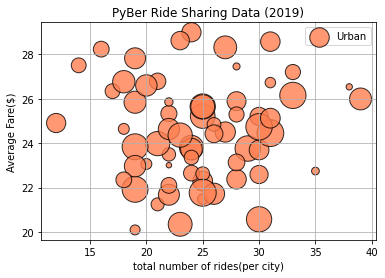

In [19]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            color = 'coral',  
            s= (10 * urban_driver_count),  
            edgecolor = 'k',
            linewidths = 1,
            alpha =0.8, label='Urban'
           )
plt.title('PyBer Ride Sharing Data (2019)')
plt.xlabel('total number of rides(per city)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)
plt.show()

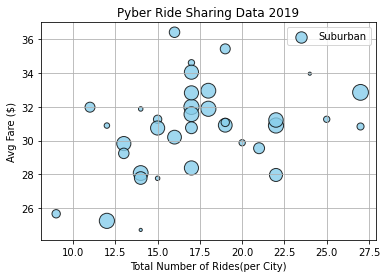

In [20]:
plt.scatter(suburb_ride_count, suburb_avg_fare,
            color = 'skyblue',
            edgecolor = 'k',
            s = 10* suburb_driver_count,
            alpha= 0.8, label = 'Suburban', 
            linewidths = 1
           )
plt.title('Pyber Ride Sharing Data 2019')
plt.xlabel('Total Number of Rides(per City)')
plt.ylabel('Avg Fare ($)')
plt.grid(True)
plt.legend()
plt.show()

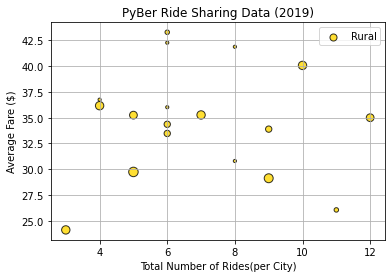

In [21]:
plt.scatter(rural_ride_count, rural_avg_fare,
            color = 'gold', s= 10 * rural_driver_count,
            linewidths = 1, alpha = 0.8,
            edgecolor = 'k', label = 'Rural'
           )

plt.title('PyBer Ride Sharing Data (2019)')
plt.xlabel('Total Number of Rides(per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid(True)
plt.show()

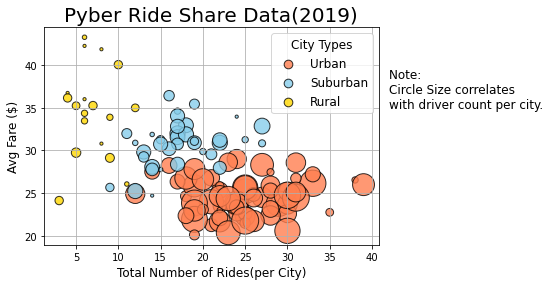

In [22]:
# add output to 1 chart

plt.scatter(urban_ride_count, urban_avg_fare, 
            color = 'coral',  
            s= (10 * urban_driver_count),  
            edgecolor = 'k',
            linewidths = 1,
            alpha =0.8, label='Urban'
           )
plt.scatter(suburb_ride_count, suburb_avg_fare,
            color = 'skyblue',
            edgecolor = 'k',
            s = 10* suburb_driver_count,
            alpha= 0.8, label = 'Suburban', 
            linewidths = 1
           )


plt.scatter(rural_ride_count, rural_avg_fare,
            color = 'gold', s= 10 * rural_driver_count,
            linewidths = 1, alpha = 0.8,
            edgecolor = 'k', label = 'Rural'
           )


plt.title('Pyber Ride Share Data(2019)', fontsize = 20)
plt.xlabel('Total Number of Rides(per City)', fontsize = 12)
plt.ylabel('Avg Fare ($)', fontsize = 12)
plt.grid(True)

lgnd = plt.legend(fontsize = '12', mode = 'Expanded', scatterpoints = 1,
                 loc = 'best', title = 'City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, 'Note: \nCircle Size correlates \nwith driver count per city.', fontsize = 12)

plt.savefig('Resources/pyber_ride_share_data_2019.png')

plt.show()




In [23]:
#determine the mean median and mode for

#total number of rides for each city type

#the average fares for each city type

#the total number of drivers for each city type

In [24]:
urban_city_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
suburb_city_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [26]:
rural_city_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [27]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
suburb_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
round(urban_ride_count.mean(), 2), round(suburb_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [31]:
round(urban_ride_count.median(), 2), round(suburb_ride_count.median(), 2), round(rural_ride_count.median(), 2)






(24.0, 17.0, 6.0)

In [32]:
round(urban_ride_count.mode(), 2), round(suburb_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)





(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [33]:
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The Mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')
print(f'The Median for the ride counts for urban trips is {median_urban_ride_count}.')
print(f'The Mode for the ride counts for urban trips is {mode_urban_ride_count}.')

mean_suburban_ride_count = np.mean(suburb_ride_count)
median_suburban_ride_count = np.median(suburb_ride_count)
mode_suburban_ride_count = sts.mode(suburb_ride_count)

print(f'The Mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')
print(f'The Median for the ride counts for suburban trips is {median_suburban_ride_count}.')
print(f'The Mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')


mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)

print(f'The Mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')
print(f'The Median for the ride counts for rural trips is {median_rural_ride_count}.')
print(f'The Mode for the ride counts for rural trips is {mode_rural_ride_count}.')






The Mean for the ride counts for urban trips is 24.62.
The Median for the ride counts for urban trips is 24.0.
The Mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
The Mean for the ride counts for suburban trips is 17.36.
The Median for the ride counts for suburban trips is 17.0.
The Mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).
The Mean for the ride counts for rural trips is 6.94.
The Median for the ride counts for rural trips is 6.0.
The Mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [34]:
# create box and whiskers plots that visualize each of the following
# to determine if there are any outliers

#The number of rides for each city type

#the fares for each city type

#the number of drivers for each city type


In [35]:
# get the fares for the urban cities

urban_fares = urban_city_df['fare']
mean_urban_fare = np.mean(urban_fares)
median_urban_fare = np.median(urban_fares)
mode_urban_fare = sts.mode(urban_fares)

print(f'The mean fare price for urban trips is {mean_urban_fare:.2f}')
print(f'The median fare price for urban trips is {median_urban_fare}')
print(f'The mode fare price for urban trips is {mode_urban_fare}')


The mean fare price for urban trips is 24.53
The median fare price for urban trips is 24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [36]:
suburban_fares = suburb_city_df['fare']
mean_suburban_fare = np.mean(suburban_fares)
median_suburban_fare = np.median(suburban_fares)
mode_suburban_fare = sts.mode(suburban_fares)

print(f'The mean fare price for suburban trips is {mean_suburban_fare:.2f}')
print(f'The median fare price for suburban trips is {median_suburban_fare}')
print(f'The mode fare price for suburban trips is {mode_suburban_fare}')

The mean fare price for suburban trips is 30.97
The median fare price for suburban trips is 30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [37]:
rural_fares = rural_city_df['fare']
mean_rural_fare = np.mean(rural_fares)
median_rural_fare = np.median(rural_fares)
mode_rural_fare = sts.mode(rural_fares)



print(f'The mean fare price for rural trips is {mean_rural_fare:.2f}')
print(f'The median fare price for rural trips is {median_rural_fare}')
print(f'The mode fare price for rural trips is {mode_rural_fare}')

The mean fare price for rural trips is 34.62
The median fare price for rural trips is 37.05
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


In [38]:
urban_drivers = urban_city_df['driver_count']
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

print(f'The mean number of urbans drivers is {mean_urban_drivers:.0f}.')
print(f'The median number of urban drivers is {median_urban_drivers}.')
print(f'The mode number of urban drivers is {mode_urban_drivers}.')

The mean number of urbans drivers is 37.
The median number of urban drivers is 37.0.
The mode number of urban drivers is ModeResult(mode=array([39]), count=array([86])).


In [39]:
suburban_drivers = suburb_city_df['driver_count']
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f'The mean number of suburbans drivers is {mean_suburban_drivers:.0f}.')
print(f'The median number of suburban drivers is {median_suburban_drivers}.')
print(f'The mode number of suburban drivers is {mode_suburban_drivers}.')

The mean number of suburbans drivers is 14.
The median number of suburban drivers is 16.0.
The mode number of suburban drivers is ModeResult(mode=array([20]), count=array([79])).


In [40]:
rural_drivers = rural_city_df['driver_count']
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f'The mean number of rural drivers is {mean_rural_drivers:.0f}.')
print(f'The median number of rural drivers is {median_rural_drivers}.')
print(f'The mode number of rural drivers is {mode_rural_drivers}.')

The mean number of rural drivers is 4.
The median number of rural drivers is 4.0.
The mode number of rural drivers is ModeResult(mode=array([1]), count=array([32])).


NameError: name 'x_labels' is not defined

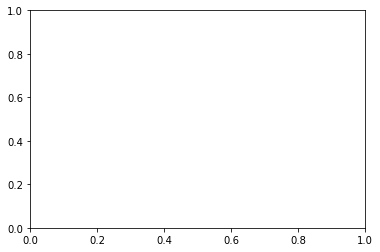

In [41]:
#x_labels = ['Urban']

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)


#add the title, y axis label and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.grid()
ax.set_yticks(np.arange(10, 41, step = 2.0))
plt.show()

In [ ]:
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburb_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize = (10, 6))


ax.boxplot(ride_count_data, labels = x_labels)


#add the title, y axis label and grid

ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.grid()
ax.set_yticks(np.arange(0, 45, step = 3.0))

plt.savefig('Resources/fig2.png')
plt.show()

In [ ]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

In [ ]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", 'Suburban', 'Rural']
avg_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(avg_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
plt.savefig('Resources/fig3.png')
plt.show()
print("Summary Statistics")
urban_fares.describe(), suburban_fares.describe(), rural_fares.describe()

In [ ]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig('Resources/fig4.png')
plt.show()
print("Summary Statistics")
urban_drivers.describe(), suburban_drivers.describe(), rural_drivers.describe()

In [42]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [43]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [44]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [45]:
# Alternate Calculate the percentage of fare for each city type.
# type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
# type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

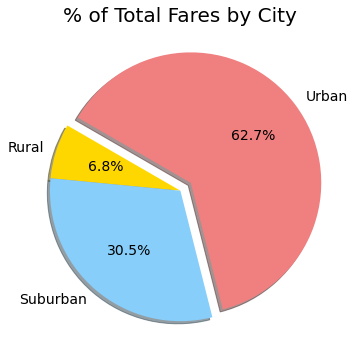

In [70]:
import matplotlib as mpl
city_type_labels = ['Rural', 'Suburban', 'Urban']
city_colors = ['gold', 'lightskyblue', 'lightcoral']
city_explode = [0,0,.1]

fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(type_percents, 
       colors = city_colors, 
       labels = city_type_labels, 
       autopct = '%1.1f%%', explode = city_explode,
      startangle = 150, shadow = True)
ax.set_title('% of Total Fares by City', fontsize = 20)
mpl.rcParams['font.size'] = 14
plt.savefig('Resources/fig5.png')
plt.show()

In [80]:
# total ride count

ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

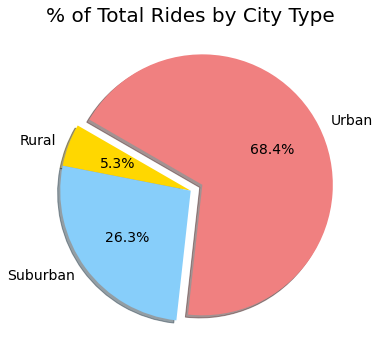

In [86]:
city_type_labels = ['Rural', 'Suburban', 'Urban']
city_colors = ['gold', 'lightskyblue', 'lightcoral']
city_explode = [0,0,.1]

fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(ride_percents, 
       colors = city_colors, 
       labels = city_type_labels, 
       autopct = '%1.1f%%', explode = city_explode,
      startangle = 150, shadow = True)
ax.set_title('% of Total Rides by City Type', fontsize = 20)
mpl.rcParams['font.size'] = 14
plt.savefig('Resources/fig6.png')
plt.show()

In [90]:
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

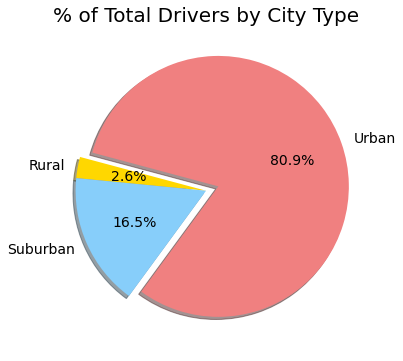

In [92]:
city_type_labels = ['Rural', 'Suburban', 'Urban']
city_colors = ['gold', 'lightskyblue', 'lightcoral']
city_explode = [0,0,.1]

fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(driver_percents, 
       colors = city_colors, 
       labels = city_type_labels, 
       autopct = '%1.1f%%', explode = city_explode,
      startangle = 165, shadow = True)
ax.set_title('% of Total Drivers by City Type', fontsize = 20)
mpl.rcParams['font.size'] = 14
plt.savefig('Resources/fig7.png')
plt.show()

In [ ]:
# create a pie chart that visualizes each of the following data
# for each city type

# The percent of total fares


# The percent of total rides


# the percent of total drivers